# preprocess

In [1]:
%cd ~/Desktop/RNA/raptcouple_test

data_dir = "example/Ishida2020/data"

/Users/sumishunsuke/Desktop/RNA/raptcouple_test


In [2]:
# 3,4,5,6 Round
fastq_files = !ls $data_dir/*.fastq
fastq_files

['example/Ishida2020/data/DRR201870.fastq',
 'example/Ishida2020/data/DRR201871.fastq',
 'example/Ishida2020/data/DRR201872.fastq',
 'example/Ishida2020/data/DRR201873.fastq']

In [3]:
from src.util_seqfile import fastq2fasta

for fastq_file in fastq_files:
    fastq2fasta(fastq_file)

In [4]:
!head -n 20 $data_dir/DRR201870.fa

>DRR201870.1 1 length=84
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGGCGCTTGCGTAGGTGCCTAAAAC
GACCATAATTGCCTACTTATGTGC
>DRR201870.2 2 length=62
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGGTTCCGCATCTACAGGGGGCGGA
AG
>DRR201870.3 3 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGTTGTTACTGAGCCGGGACTTTCG
GCCTCTGCGCACTCGCTTATGTGCGCATACATGGATCCTC
>DRR201870.4 4 length=69
TTAATACGACTCACTATAGGGAGAACTTCGACCAGAAGCAAGCCATAAACAAAGAGCCTG
TGACAGCAA
>DRR201870.5 5 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGAGCAAGAGAACTGGGAATGATAG
GTCGGCCTAAGACCAGCTATGTGCGCATACATGGATCCTC
>DRR201870.6 6 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGAGCGGGGCCTGTGTTCCGCTAAC
TTTCAGCTCGGGCTAATTATGTGCGCATACATGGATCCTC
>DRR201870.7 7 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGAGAACAGCGTCTGAGGACGGGCG


# config

fwd: TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG  
rev: GAGGATCCATGTATGCGCACATA  
full: GGGAGAACTTCGACCAGAAG-40N-TATGTGCGCATACATGGATCCTC  

In [5]:
!cat example/Ishida2020/config.yaml

Preprocess_parameters:
  N_random: 40
  adapter_3: TATGTGCGCATACATGGATCCTC
  adapter_5: TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG
  data_dir: ./example/Ishida2020/data
  fasta_annotation:
    DRR201870.fa: Ishida2020-3R
    DRR201871.fa: Ishida2020-4R
    DRR201872.fa: Ishida2020-5R
    DRR201873.fa: Ishida2020-6R
  merged_fasta: Ishida2020.count.ann.all_selex.fa
MSA_parameters:
  all_fasta: ./example/Ishida2020/data/Ishida2020.count.ann.all_selex.fa
  target_id: Ishida2020-6R-8-527-11090.77-0
  save_dir: ./example/Ishida2020/outputs
  prefix: ""
  iters: 10
  F1: 0.02
  F2: 0.001 # 1e-3
  F3: 0.0001 # 1e-4
  T: 5
  domT: 5
  incT: 5
  incdomT: 5
  print_result: true
Potts_parameters:
  input_fasta: ./example/Ishida2020/outputs/Ishida2020-6R-8-527-11090.77-0.msa
  sim_threshold: 0.05
  vocab: AUGC.
  iters: 200
  suffix: ""
  print_result: true


In [ ]:
# preprocess

# !python scripts/merge_and_cutadapt_all_rounds.py  --config ./example/Ishida2020/config.yaml


This is cutadapt 4.4 with Python 3.10.11
Command line parameters: --discard-untrimmed -g TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG ./example/Ishida2020/data/DRR201870.fa -o ./example/Ishida2020/data/DRR201870.trim.tmp.fa
Processing single-end reads on 1 core ...
Finished in 0.876 s (5.983 µs/read; 10.03 M reads/minute).

=== Summary ===

Total reads processed:                 146,505
Reads with adapters:                   145,124 (99.1%)

== Read fate breakdown ==
Reads discarded as untrimmed:            1,381 (0.9%)
Reads written (passing filters):       145,124 (99.1%)

Total basepairs processed:    13,237,147 bp
Total written (filtered):      7,813,153 bp (59.0%)

=== Adapter 1 ===

Sequence: TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG; Type: regular 5'; Length: 37; Trimmed: 145124 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-29 bp: 2; 30-37 bp: 3

Overview of removed sequences
length	count	expect	max.err	error counts
29	7	0.0	2	6 1
30	1	0.0	3	0 0 1
31	3	0.0	3	2

# jackhmmer & DCA

In [13]:
!grep -A1 "Ishida2020-6R-8-" ./example/Ishida2020/data/Ishida2020.count.ann.all_selex.unique.fa

>Ishida2020-3R-2145-1-10.06_Ishida2020-4R-196-28-354.20_Ishida2020-5R-26-266-3412.97_Ishida2020-6R-8-527-11090.77-0
GCTGTGTCTACGTCCGGATTGGGGACCTGCACGGCCCATG


In [26]:
# target_id = "Ishida2020-6R-1-2626-55264.43"
# target_id = "Ishida2020-6R-8-527-11090.77"
!python ./scripts/run_jackhmmer.py --config ./example/Ishida2020/config_mutation.yaml

target	: Ishida2020-6R-8-527-11090.77
sequence: GCTGTGTCTACGTCCGGATTGGGGACCTGCACGGCCCATG
Iteration=1 Hits=171 Included=171 Converged=False
Iteration=2 Hits=522 Included=522 Converged=False
Iteration=3 Hits=703 Included=703 Converged=False
Iteration=4 Hits=755 Included=755 Converged=False
Iteration=5 Hits=765 Included=765 Converged=False
Iteration=6 Hits=768 Included=768 Converged=False
Iteration=7 Hits=768 Included=768 Converged=True
MSA saved	: ./example/Ishida2020/outputs/default_Ishida2020-6R-8-527-11090.77.msa


# train potts model 

In [28]:
import subprocess 

cmd = f"""python scripts/train_potts.py --config ./example/Ishida2020/config_mutation.yaml"""
res = subprocess.run(cmd, shell=True, capture_output=True)
print(res.stdout.decode())
print(res.stderr.decode())



Found focus Ishida2020-3R-2145-1-10.06_Ishida2020-4R-196-28-354.20_Ishida2020-5R-26-266-3412.97_Ishida2020-6R-8-527-11090.77-0/1-40 as sequence 2
769 valid sequences out of 769 
87 sites out of 87
Effective number of samples: 33.4	(95% identical neighborhood = 1.000 samples)
iter	time	cond	fx	-loglk	||h||	||e||
1	0.1	10.66	1260.6	1236.1	27.1	1.0
2	0.2	6.39	1017.8	909.7	27.2	2.4
3	0.3	5.11	951.1	741.3	27.2	3.4
4	0.4	3.03	927.2	697.1	27.2	3.6
5	0.4	2.03	915.8	680.9	27.2	3.6
6	0.5	1.65	905.4	659.8	27.2	3.7
7	0.6	1.39	901.6	646.8	27.3	3.8
8	0.6	0.54	899.8	642.5	27.3	3.8
9	0.7	0.37	899.4	641.8	27.3	3.8
10	0.8	0.30	899.0	640.8	27.3	3.8
11	0.8	0.38	898.8	640.2	27.4	3.8
12	0.9	0.29	898.6	639.0	27.4	3.8
13	1.0	0.24	898.4	638.7	27.4	3.8
14	1.1	0.34	898.0	638.1	27.5	3.8
15	1.1	0.54	897.4	637.1	27.7	3.8
16	1.2	0.68	895.9	634.1	28.4	3.8
17	1.3	1.58	894.0	631.4	29.6	3.8
18	1.3	1.16	890.8	628.6	30.4	3.8
19	1.4	0.96	881.8	623.3	33.9	3.8
20	1.5	1.11	876.9	622.0	36.4	3.7
21	1.5	0.96	871.8	620.8	40.8	3.

# visualize

(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

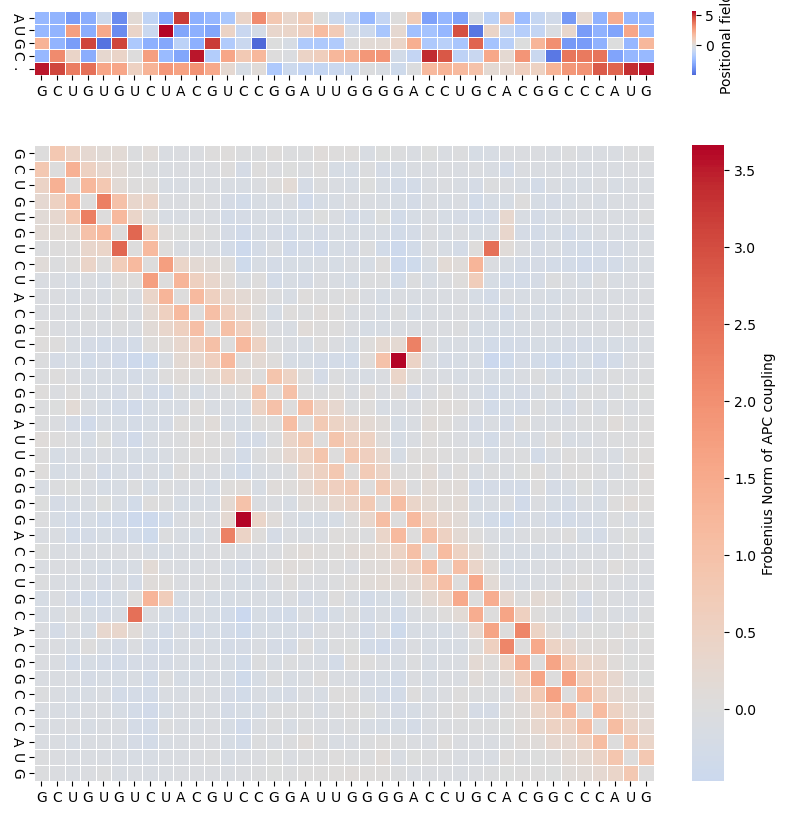

In [29]:
from src.visualize import plot_from_param_file

# target_id = "Ishida2020-6R-1-2626-55264.43" this also works
target_id = "Ishida2020-6R-8-527-11090.77"

plot_from_param_file(
    f"./example/Ishida2020/outputs/{target_id}.model_params",
    use_gap = False,
    square = False
    )